<h1> TP - Arbre Binaire de recherche </h1>

<h2> A) Implementation </h2> 
<p> Un ABR étant un cas particulier d'un arbre binaire, on peut reprendre l'implémentation déjà existante de la classe AB en adaptant seulement le constructeur de la classe:</p>

In [1]:
class ABR:
    def __init__(self, racine=None):
        self.racine = racine
        if self.racine is not None:
            self.gauche = ABR()  
            self.droit = ABR()
    
    def est_vide(self):
        return self.racine==None
      
    
    def hauteur(self):
        if self.est_vide():
            return -1
        else:
            return 1+max(self.gauche.hauteur(),self.droit.hauteur())

<h2> B) Representation </h2>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(8,8), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if not arbre.est_vide():
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre.racine)
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre ==():
        return
    
    branches = [[]]
    profondeur = arbre.hauteur()
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre.racine)}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()       


<h3> Test  en construisant à la main un arbre binaire de recherche </h3>

In [3]:
a=ABR(5)
a.gauche=ABR(3)
a.gauche.droit=ABR(4)
a.droit=ABR(8)
a.droit.droit=ABR(10)
a.droit.gauche=ABR(7)

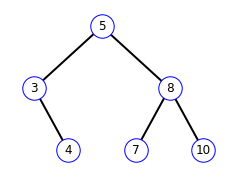

In [4]:
repr_graph(a,(4,3),False)

<h2> Exercice 1 : Fonction recherche dans un arbre binaire de recherche </h2>
<p> Completer la fonction recherche qui renvoie Vraie si valeur est dans l'arbre ou Faux sinon </p> 

In [ ]:
def rechercher(arbre, valeur):
    if ... :
        return False
    elif ... :
        return True
    elif valeur < self.cle:
        return ...
    else:
        return ...

In [ ]:
#tests


<h2> Exercice 2 : </h2> <p>  Ecrire les fonctions min_abr(arbre) et max_abr(arbre) qui renvoie respectivement le mininmum (ou le maximum) des valeurs de l'arbre </p>

In [ ]:
def min_abr (arbre):
    pass

In [ ]:
def max_abr (arbre):
    pass

In [ ]:
#tests

<h2> Exercice 3 </h2> <p>Ecrire la fonction inserer(arbre,x) qui insere x dans l'arbre binaire de recherche arbre </p>

In [20]:
def inserer(arbre,x):
    if .............:
        if ..<=..........:
            if .................est_vide():
                ...............=ABR(x)
            else:
                ................
        else:
            if ...............est_vide():
                ....................
            else:
                .......................

In [27]:
#test de la fonction inserer qui permet de construire l'arbre binaire de rechervhe A
A=ABR(12)
inserer(A,15)
inserer(A,1)
inserer(A,3)
inserer(A,8)
inserer(A,5)
inserer(A,2)

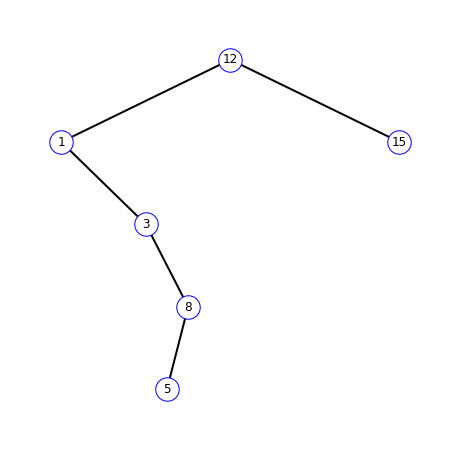

In [26]:
repr_graph(A)

<h2> Exercice 4 </h2>
<p>Ecrire la fonction list_to_ABR(liste) qui insere dans l'ordre les valeurs de liste dans un arbre binaire </p>

In [28]:
def list_to_ABR(liste):
    pass

In [32]:
B=list_to_ABR([8,5,3,7,4,6,9,1])

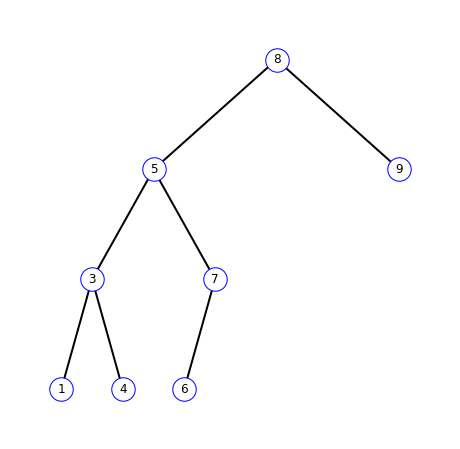

In [33]:
repr_graph(B)

<h3> bonus 1 : dans le cas d'une recherche d'une valeur, ecrire en cas de succès le chemin permettant d'aller de la racine à la valeur cherchée</h3> 

<h3> bonus2 : Ecriture une fonction ( ou plusieurs !!!) qui permet de verifier si un arbre binaire est un arbre binaire de recherche</h3>